In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , root_mean_squared_error

In [61]:
pd.set_option("display.max_columns", None)

In [62]:
turbo=pd.concat([pd.read_csv("C:/Users/user/Desktop/LTC_2ay/Xam_Data/turbo-az-2022-12-05T00-00-03.csv")
                    ,pd.read_csv("C:/Users/user/Desktop/LTC_2ay/Xam_Data/turbo-az-2022-12-12T00-00-06.csv")
                    ,pd.read_csv("C:/Users/user/Desktop/LTC_2ay/Xam_Data/turbo-az-2022-12-19T00-00-06.csv")], axis=0, ignore_index=True)

turbo

,ban_novu,buraxilis_ili,city,diger_gostericiler,image,is_new,link,marka,model,muherrik,muherrik_gucu,oturucu,price_currency,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,yurus
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6783430-bmw-745,BMW,745,4.4 L,333 a.g.,Arxa,AZN,12 900,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,315 000 km
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6657726-mercedes-c-230,Mercedes,C 230,2.3 L,150 a.g.,Arxa,AZN,11 200,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,239 000 km
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6883755-faw-besturn-b50,FAW,Besturn B50,1.6 L,103 a.g.,Ön,AZN,10 500,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,172 000 km
3,Sedan,2013,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6754385-brilliance-h-530,Brilliance,H 530,1.6 L,110 a.g.,Ön,AZN,13 400,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,92 000 km
4,Sedan,1995,Bakı,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6883757-mercedes-c-220,Mercedes,C 220,2.2 L,150 a.g.,Arxa,AZN,8 800,Yaş Asfalt,Elvin,(051) 833-44-44,NaN,NaN,Avtomat,Benzin,298 889 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31874,Sedan,2021,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6810834-mercedes-s-400-...,Mercedes,S 400 d 4MATIC,2.9 L,330 a.g.,Tam,$,169 500,Qara,NaN,NaN,(070) 288-44-73,"Avtosalon ""Royal Motors""",Avtomat,Dizel,13 000 km
31875,Offroader / SUV,2022,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",https://turbo.azstatic.com/uploads/full/2022%2...,Bəli,https://turbo.az/autos/5997529-geely-coolray,Geely,Coolray,1.5 L,177 a.g.,Ön,AZN,39 900,Gümüşü,NaN,NaN,(050) 838-58-58,Geely Azərbaycan,Avtomat,Benzin,0 km
31876,Offroader / SUV,2012,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6505303-land-rover-rang...,Land Rover,Range Rover,5.0 L,510 a.g.,Tam,$,43 400,Ağ,NaN,NaN,(055) 396-00-60,"Avtosalon ""Lüks Avto""",Avtomat,Benzin,98 000 km
31877,Offroader / SUV,2022,Bakı,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə...",https://turbo.azstatic.com/uploads/full/2022%2...,Bəli,https://turbo.az/autos/6893688-lexus-nx-200,Lexus,NX 200,2.0 L,150 a.g.,Tam,$,47 000,Boz,NaN,NaN,(050) 211-81-69,"Avtosalon ""TT Park""",Avtomat,Benzin,0 km


## Data Cleaning

Datasetdə data təmizləmə prosesi zamanı bir neçə vacib nüansla qarşılaşdım. Vacib sütun olan 'diger_gostericiler' sütununda 'null' dəyərlər var idi. Bəzi sütunlar 'numerik' olması lazım olduğu halda 'object' olaraq qeyd edilmişdi. Bu sütunları olmalı olduğu formaya gətirmək üçün aşağıdakı addımları atdım:

1- 'price_value', 'muherrik', 'muherrik_gucu', 'yurus' sütunlarının tiplərinin düzəldilməsi:

Bu sütunların numerik tiplərə çevrilməsi üçün əvvəlcə təmizləmə işləri aparıldı. Məsələn, 'price_value' sütununda olan valyuta dəyər nizamsızlığı düzəldildi. 'muherrik','muhərrik gucu' sütununda olan artıq dəyərlər çıxarıldı və rəqəmlər numerik dəyərə cevrilə biləcək hala gətirildi.


In [63]:
turbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31879 entries, 0 to 31878
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ban_novu            31879 non-null  object
 1   buraxilis_ili       31879 non-null  int64 
 2   city                31879 non-null  object
 3   diger_gostericiler  29315 non-null  object
 4   image               31879 non-null  object
 5   is_new              31879 non-null  object
 6   link                31879 non-null  object
 7   marka               31879 non-null  object
 8   model               31879 non-null  object
 9   muherrik            31879 non-null  object
 10  muherrik_gucu       31879 non-null  object
 11  oturucu             31879 non-null  object
 12  price_currency      31879 non-null  object
 13  price_value         31879 non-null  object
 14  reng                31879 non-null  object
 15  seller_name         23882 non-null  object
 16  seller_phone        23

In [64]:
turbo.head(5)

,ban_novu,buraxilis_ili,city,diger_gostericiler,image,is_new,link,marka,model,muherrik,muherrik_gucu,oturucu,price_currency,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,yurus
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6783430-bmw-745,BMW,745,4.4 L,333 a.g.,Arxa,AZN,12 900,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,315 000 km
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6657726-mercedes-c-230,Mercedes,C 230,2.3 L,150 a.g.,Arxa,AZN,11 200,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,239 000 km
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6883755-faw-besturn-b50,FAW,Besturn B50,1.6 L,103 a.g.,Ön,AZN,10 500,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,172 000 km
3,Sedan,2013,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6754385-brilliance-h-530,Brilliance,H 530,1.6 L,110 a.g.,Ön,AZN,13 400,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,92 000 km
4,Sedan,1995,Bakı,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6883757-mercedes-c-220,Mercedes,C 220,2.2 L,150 a.g.,Arxa,AZN,8 800,Yaş Asfalt,Elvin,(051) 833-44-44,NaN,NaN,Avtomat,Benzin,298 889 km


In [65]:
turbo['price_value'] = turbo['price_value'].str.replace(' ', '').str.replace(',', '.')
turbo['price_value'] = turbo['price_value'].astype(float).astype(int)

In [66]:
turbo.price_currency.unique()

array(['AZN', '$', '€'], dtype=object)

In [67]:
turbo.loc[turbo["price_currency"]=="$", "price_value"]=turbo.loc[turbo["price_currency"]=="$", "price_value"].apply(lambda x : x*1.7)
turbo.loc[turbo["price_currency"]=="€", "price_value"]=turbo.loc[turbo["price_currency"]=="€", "price_value"].apply(lambda x : x*1.84)

In [68]:
turbo.head(3)

,ban_novu,buraxilis_ili,city,diger_gostericiler,image,is_new,link,marka,model,muherrik,muherrik_gucu,oturucu,price_currency,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,yurus
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6783430-bmw-745,BMW,745,4.4 L,333 a.g.,Arxa,AZN,12900.0,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,315 000 km
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6657726-mercedes-c-230,Mercedes,C 230,2.3 L,150 a.g.,Arxa,AZN,11200.0,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,239 000 km
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6883755-faw-besturn-b50,FAW,Besturn B50,1.6 L,103 a.g.,Ön,AZN,10500.0,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,172 000 km


In [69]:
turbo[["muherrik_a.g", "at_gucu"]]=turbo["muherrik_gucu"].str.split(" ",n=1, expand=True)
turbo[["muherrik_l","L"]]=turbo["muherrik"].str.split(" ", n=1, expand=True)
turbo[["yurus_km","KM"]]=turbo["yurus"].str.split(" km" ,expand=True)

In [70]:
turbo.head(3)

,ban_novu,buraxilis_ili,city,diger_gostericiler,image,is_new,link,marka,model,muherrik,muherrik_gucu,oturucu,price_currency,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,yurus,muherrik_a.g,at_gucu,muherrik_l,L,yurus_km,KM
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6783430-bmw-745,BMW,745,4.4 L,333 a.g.,Arxa,AZN,12900.0,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,315 000 km,333,a.g.,4.4,L,315 000,
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6657726-mercedes-c-230,Mercedes,C 230,2.3 L,150 a.g.,Arxa,AZN,11200.0,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,239 000 km,150,a.g.,2.3,L,239 000,
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6883755-faw-besturn-b50,FAW,Besturn B50,1.6 L,103 a.g.,Ön,AZN,10500.0,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,172 000 km,103,a.g.,1.6,L,172 000,


In [71]:
turbo["yurus_km"]=turbo["yurus_km"].str.replace(" ","")

In [72]:
turbo.head(4)

,ban_novu,buraxilis_ili,city,diger_gostericiler,image,is_new,link,marka,model,muherrik,muherrik_gucu,oturucu,price_currency,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,yurus,muherrik_a.g,at_gucu,muherrik_l,L,yurus_km,KM
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6783430-bmw-745,BMW,745,4.4 L,333 a.g.,Arxa,AZN,12900.0,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,315 000 km,333,a.g.,4.4,L,315000,
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6657726-mercedes-c-230,Mercedes,C 230,2.3 L,150 a.g.,Arxa,AZN,11200.0,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,239 000 km,150,a.g.,2.3,L,239000,
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6883755-faw-besturn-b50,FAW,Besturn B50,1.6 L,103 a.g.,Ön,AZN,10500.0,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,172 000 km,103,a.g.,1.6,L,172000,
3,Sedan,2013,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6754385-brilliance-h-530,Brilliance,H 530,1.6 L,110 a.g.,Ön,AZN,13400.0,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,92 000 km,110,a.g.,1.6,L,92000,


2- 'diger_gostericiler' sütununda 'null' dəyərlərin doldurulması

'diger_gostericiler' datasetdəki ən önəmli sütunlardan biridir və bu sütundan feature engineering mərhələsində əhəmiyyətli sütunlar yaradılacaq. Buna görə də, 'diger_gostericiler' sütununda olan 'null' dəyərləri mütləq və müvafiq olaraq doldurdum.

In [73]:
turbo.isnull().sum()

ban_novu                  0
buraxilis_ili             0
city                      0
diger_gostericiler     2564
image                     0
is_new                    0
link                      0
marka                     0
model                     0
muherrik                  0
muherrik_gucu             0
oturucu                   0
price_currency            0
price_value               0
reng                      0
seller_name            7997
seller_phone           7997
shop_contact_list     23906
shop_name             23906
suret_qutusu              0
yanacaq_novu              0
yurus                     0
muherrik_a.g              0
at_gucu                   0
muherrik_l                0
L                         0
yurus_km                  0
KM                        0
dtype: int64

In [74]:
turbo.diger_gostericiler

0        Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...
1        Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...
2        Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...
3        Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...
4        Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...
                               ...                        
31874    Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...
31875    Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...
31876    Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...
31877    Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə...
31878    Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...
Name: diger_gostericiler, Length: 31879, dtype: object

In [75]:
turbo['null']=turbo['diger_gostericiler'].apply(lambda col : "Bəli" if pd.isna(col) else "Xeyr")

In [76]:
turbo.null.value_counts()

null
Xeyr    29315
Bəli     2564
Name: count, dtype: int64

In [77]:
def most_common_features(group):
    
    common_features = group['diger_gostericiler'].mode()
    
    if len(common_features) > 1:
        return common_features.apply(lambda x: (x, len(x.split(',')))).max()[0]
    else:
        return common_features.iloc[0] if not common_features.empty else None

most_common_features_by_group = turbo.groupby(['marka', 'model']).apply(most_common_features)

In [78]:
feature_lookup = pd.DataFrame(most_common_features_by_group).reset_index()

feature_lookup.columns = ["marka","model","xususiyyetler"]

feature_lookup = feature_lookup[~feature_lookup.xususiyyetler.isna()].copy()

In [79]:
merged_data = turbo.merge(feature_lookup, on=['marka', 'model'], how='left')

merged_data['diger_gostericiler'] = merged_data['diger_gostericiler'].fillna(merged_data['xususiyyetler'])

merged_data.drop(columns=['xususiyyetler'], inplace=True)

In [80]:
turbo0=merged_data
turbo0.isnull().sum()

ban_novu                  0
buraxilis_ili             0
city                      0
diger_gostericiler      144
image                     0
is_new                    0
link                      0
marka                     0
model                     0
muherrik                  0
muherrik_gucu             0
oturucu                   0
price_currency            0
price_value               0
reng                      0
seller_name            7997
seller_phone           7997
shop_contact_list     23906
shop_name             23906
suret_qutusu              0
yanacaq_novu              0
yurus                     0
muherrik_a.g              0
at_gucu                   0
muherrik_l                0
L                         0
yurus_km                  0
KM                        0
null                      0
dtype: int64

In [81]:
turbo0[turbo0.diger_gostericiler.isna()]["ban_novu"].value_counts()

ban_novu
Yük maşını         65
Motosiklet         25
Sedan              16
Hetçbek             8
Offroader / SUV     8
Moped               5
Furqon              5
Dartqı              4
Mikroavtobus        4
Avtobus             2
Qolfkar             1
Kvadrosikl          1
Name: count, dtype: int64

In [82]:
mcf_mi = turbo.groupby(['marka', 'ban_novu', 'buraxilis_ili']).apply(most_common_features)

mcf_bi = turbo.groupby(['ban_novu', 'buraxilis_ili']).apply(most_common_features)

mcf_b = turbo.groupby(['ban_novu']).apply(most_common_features)

In [83]:
fl_mi = pd.DataFrame(mcf_mi).reset_index()
fl_mi.columns = ["marka",'ban_novu',"buraxilis_ili","features_mi"]
fl_mi = fl_mi[~fl_mi.features_mi.isna()].copy()

fl_bi = pd.DataFrame(mcf_bi).reset_index()
fl_bi.columns = ["ban_novu","buraxilis_ili","features_bi"]
fl_bi = fl_bi[~fl_bi.features_bi.isna()].copy()


fl_b = pd.DataFrame(mcf_b).reset_index()
fl_b.columns = ["ban_novu","features_b"]
fl_b = fl_b[~fl_b.features_b.isna()].copy()

In [84]:
turbo2 = turbo0.merge(fl_mi, on=['marka', 'ban_novu', 'buraxilis_ili'],how='left').merge(fl_bi, on=['ban_novu', 'buraxilis_ili'],how='left').merge(fl_b, on='ban_novu', how='left')

turbo2.head()

,ban_novu,buraxilis_ili,city,diger_gostericiler,image,is_new,link,marka,model,muherrik,muherrik_gucu,oturucu,price_currency,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,yurus,muherrik_a.g,at_gucu,muherrik_l,L,yurus_km,KM,null,features_mi,features_bi,features_b
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6783430-bmw-745,BMW,745,4.4 L,333 a.g.,Arxa,AZN,12900.0,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,315 000 km,333,a.g.,4.4,L,315000,,Xeyr,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...","Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...","Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,..."
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6657726-mercedes-c-230,Mercedes,C 230,2.3 L,150 a.g.,Arxa,AZN,11200.0,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,239 000 km,150,a.g.,2.3,L,239000,,Xeyr,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...","Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...","Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,..."
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6883755-faw-besturn-b50,FAW,Besturn B50,1.6 L,103 a.g.,Ön,AZN,10500.0,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,172 000 km,103,a.g.,1.6,L,172000,,Xeyr,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...","Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...","Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,..."
3,Sedan,2013,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6754385-brilliance-h-530,Brilliance,H 530,1.6 L,110 a.g.,Ön,AZN,13400.0,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,92 000 km,110,a.g.,1.6,L,92000,,Xeyr,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...","Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...","Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,..."
4,Sedan,1995,Bakı,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",https://turbo.azstatic.com/uploads/full/2022%2...,Xeyr,https://turbo.az/autos/6883757-mercedes-c-220,Mercedes,C 220,2.2 L,150 a.g.,Arxa,AZN,8800.0,Yaş Asfalt,Elvin,(051) 833-44-44,NaN,NaN,Avtomat,Benzin,298 889 km,150,a.g.,2.2,L,298889,,Xeyr,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...","Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...","Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,..."


In [85]:
turbo2['diger_gostericiler'] = turbo2['diger_gostericiler'].fillna(turbo2['features_mi']).fillna(turbo2['features_bi']).fillna(turbo2['features_b'])


turbo2.drop(columns=['features_mi','features_bi','features_b'], inplace=True)

In [86]:
turbo2.isnull().sum()

ban_novu                  0
buraxilis_ili             0
city                      0
diger_gostericiler        1
image                     0
is_new                    0
link                      0
marka                     0
model                     0
muherrik                  0
muherrik_gucu             0
oturucu                   0
price_currency            0
price_value               0
reng                      0
seller_name            7997
seller_phone           7997
shop_contact_list     23906
shop_name             23906
suret_qutusu              0
yanacaq_novu              0
yurus                     0
muherrik_a.g              0
at_gucu                   0
muherrik_l                0
L                         0
yurus_km                  0
KM                        0
null                      0
dtype: int64

In [87]:
turbo2[turbo2.diger_gostericiler.isna()]["ban_novu"].value_counts()

ban_novu
Qolfkar    1
Name: count, dtype: int64

In [88]:
turbo2['diger_gostericiler'] = turbo2['diger_gostericiler'].fillna("Mərkəzi qapanma")

In [89]:
turbo=turbo2
turbo.isnull().sum()

ban_novu                  0
buraxilis_ili             0
city                      0
diger_gostericiler        0
image                     0
is_new                    0
link                      0
marka                     0
model                     0
muherrik                  0
muherrik_gucu             0
oturucu                   0
price_currency            0
price_value               0
reng                      0
seller_name            7997
seller_phone           7997
shop_contact_list     23906
shop_name             23906
suret_qutusu              0
yanacaq_novu              0
yurus                     0
muherrik_a.g              0
at_gucu                   0
muherrik_l                0
L                         0
yurus_km                  0
KM                        0
null                      0
dtype: int64

3- Göstəricilərin tipinə uyğunlaşdırılması və lazımsız sütunların silinməsi:

Təmizləmə və tip çevrilmə işləri tamamlandıqdan sonra artıq sütunlar datasetdən sildim və yalnız lazım olan məlumatlar saxladım.

In [90]:
turbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31879 entries, 0 to 31878
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ban_novu            31879 non-null  object 
 1   buraxilis_ili       31879 non-null  int64  
 2   city                31879 non-null  object 
 3   diger_gostericiler  31879 non-null  object 
 4   image               31879 non-null  object 
 5   is_new              31879 non-null  object 
 6   link                31879 non-null  object 
 7   marka               31879 non-null  object 
 8   model               31879 non-null  object 
 9   muherrik            31879 non-null  object 
 10  muherrik_gucu       31879 non-null  object 
 11  oturucu             31879 non-null  object 
 12  price_currency      31879 non-null  object 
 13  price_value         31879 non-null  float64
 14  reng                31879 non-null  object 
 15  seller_name         23882 non-null  object 
 16  sell

In [91]:
turbo["yurus_km"]=turbo["yurus_km"].astype(int)
turbo["muherrik_l"]=turbo["muherrik_l"].astype(float)
turbo["muherrik_a.g"]=turbo["muherrik_a.g"].astype(int)
turbo["buraxilis_ili"]=turbo["buraxilis_ili"].astype(int)
turbo["price_value"]=turbo["price_value"].astype(int)

In [92]:
turbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31879 entries, 0 to 31878
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ban_novu            31879 non-null  object 
 1   buraxilis_ili       31879 non-null  int32  
 2   city                31879 non-null  object 
 3   diger_gostericiler  31879 non-null  object 
 4   image               31879 non-null  object 
 5   is_new              31879 non-null  object 
 6   link                31879 non-null  object 
 7   marka               31879 non-null  object 
 8   model               31879 non-null  object 
 9   muherrik            31879 non-null  object 
 10  muherrik_gucu       31879 non-null  object 
 11  oturucu             31879 non-null  object 
 12  price_currency      31879 non-null  object 
 13  price_value         31879 non-null  int32  
 14  reng                31879 non-null  object 
 15  seller_name         23882 non-null  object 
 16  sell

In [93]:
turbo.drop(["image","link","muherrik","muherrik_gucu","price_currency","yurus","at_gucu","L","KM"], axis=1, inplace=True)

In [94]:
turbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31879 entries, 0 to 31878
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ban_novu            31879 non-null  object 
 1   buraxilis_ili       31879 non-null  int32  
 2   city                31879 non-null  object 
 3   diger_gostericiler  31879 non-null  object 
 4   is_new              31879 non-null  object 
 5   marka               31879 non-null  object 
 6   model               31879 non-null  object 
 7   oturucu             31879 non-null  object 
 8   price_value         31879 non-null  int32  
 9   reng                31879 non-null  object 
 10  seller_name         23882 non-null  object 
 11  seller_phone        23882 non-null  object 
 12  shop_contact_list   7973 non-null   object 
 13  shop_name           7973 non-null   object 
 14  suret_qutusu        31879 non-null  object 
 15  yanacaq_novu        31879 non-null  object 
 16  muhe

In [95]:
turbo.head(4)

,ban_novu,buraxilis_ili,city,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Arxa,12900,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,333,4.4,315000,Xeyr
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Arxa,11200,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,150,2.3,239000,Xeyr
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Ön,10500,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,103,1.6,172000,Xeyr
3,Sedan,2013,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Ön,13400,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,110,1.6,92000,Xeyr


## Duplicate

Dublikatları təyin etmək və ya silmək, data məlumatlarının təmizlənmə prosesində əhəmiyyətli bir addımdır. Dublikatlar datasetdə eyni məlumatlara sahib olan qeydləri göstərir və analiz zamanı səhv nəticələrə səbəb ola bilər. Bu səbəblərə görə, dublikatlar təyin edilərək datanın doğruluğu və effektivliyi artırılır.

In [96]:
turbo.shape

(31879, 20)

In [97]:
turbo.drop_duplicates(inplace=True)

In [98]:
turbo.shape

(26750, 20)

## Outlier sutunu yaratmaq

Outlier sütunu, machine learning modelinə datasetdə mövcud olan outlier dəyərlər haqqında məlumat vermək üçün yaradılmışdır. Bu sütun, outlierlər təyin edilmədən öncə datasetdə mövcud olan sıra dışı dəyərləri qeyd edir və modelə outlierlərin var olduğunu bildirir.

Məqsəd modelin datasetdə mövcud olan anormallıqları dərhal tanıması və mövcud outlier dəyərlər haqqında məlumat sahib olmasıdır. Bu, modelin daha doğru və effektiv nəticələr verməsini təmin edir.

In [99]:
def outlier(melumat):
    outlier_flags = np.zeros(melumat.shape[0])
    for col in melumat.select_dtypes(exclude='object').columns:
        
        q1=melumat[col].quantile(0.25)
        q3=melumat[col].quantile(0.75)
        IQR=q3-q1

        lower_limit=q1-IQR*1.5
        upper_limit=q3+IQR*1.5
            
        outlier_flags = np.maximum(outlier_flags, (melumat[col] < lower_limit) | (melumat[col] > upper_limit))

    return outlier_flags

In [100]:
turbo["outlier"]=outlier(turbo).astype(int)

In [101]:
turbo["outlier"].value_counts()

outlier
0    21588
1     5162
Name: count, dtype: int64

In [102]:
turbo.head(4)

,ban_novu,buraxilis_ili,city,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Arxa,12900,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,333,4.4,315000,Xeyr,1
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Arxa,11200,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,150,2.3,239000,Xeyr,0
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Ön,10500,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,103,1.6,172000,Xeyr,0
3,Sedan,2013,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Ön,13400,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,110,1.6,92000,Xeyr,0


In [103]:
turbo['outlier']=turbo['outlier'].apply(lambda col : "Bəli" if col==1 else "Xeyr")

In [104]:
turbo["outlier"].value_counts()

outlier
Xeyr    21588
Bəli     5162
Name: count, dtype: int64

In [105]:
turbo.head()

,ban_novu,buraxilis_ili,city,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Arxa,12900,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,333,4.4,315000,Xeyr,Bəli
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Arxa,11200,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,150,2.3,239000,Xeyr,Xeyr
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Ön,10500,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,103,1.6,172000,Xeyr,Xeyr
3,Sedan,2013,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Ön,13400,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,110,1.6,92000,Xeyr,Xeyr
4,Sedan,1995,Bakı,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Xeyr,Mercedes,C 220,Arxa,8800,Yaş Asfalt,Elvin,(051) 833-44-44,NaN,NaN,Avtomat,Benzin,150,2.2,298889,Xeyr,Xeyr


## Outlier'leri sixmaq

IQR ilə outlier sixmağın məqsədi, datasetdəki sıra dışı dəyərləri müəyyənləşdirərək onları normal dəyərlərə getirməkdir. Bu, datanın müvafiq olaraq analiz edilməsi üçün vacibdir. Bu metod, datanın düzgün və dəqiq təhlil edilməsini təmin edir. Outlierlar təyin edilərək, datasetdəki anormallıqlar aradan qaldırılır və analizlər daha doğru nəticələr verir


In [106]:
def outliers(melumat):
    for col in melumat.select_dtypes(exclude='object').columns:
        q1 = melumat[col].quantile(0.25)
        q3 = melumat[col].quantile(0.75)
        IQR = q3 - q1

        lower_limit = q1 - IQR * 1.5
        upper_limit = q3 + IQR * 1.5
        
        melumat[col] = np.where(melumat[col] >= upper_limit, upper_limit, np.where(melumat[col] <= lower_limit, lower_limit, melumat[col]))

In [107]:
outliers(turbo)

In [108]:
turbo

,ban_novu,buraxilis_ili,city,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier
0,Sedan,2001.0,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Arxa,12900.0,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,333.0,3.85,315000.0,Xeyr,Bəli
1,Sedan,1999.0,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Arxa,11200.0,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,150.0,2.30,239000.0,Xeyr,Xeyr
2,Sedan,2013.0,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Ön,10500.0,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,103.0,1.60,172000.0,Xeyr,Xeyr
3,Sedan,2013.0,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Ön,13400.0,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,110.0,1.60,92000.0,Xeyr,Xeyr
4,Sedan,1995.0,Bakı,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Xeyr,Mercedes,C 220,Arxa,8800.0,Yaş Asfalt,Elvin,(051) 833-44-44,NaN,NaN,Avtomat,Benzin,150.0,2.20,298889.0,Xeyr,Xeyr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,Offroader / SUV,2007.0,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Lexus,LX 470,Tam,34500.0,Qara,Mahir,(055) 288-00-22,NaN,NaN,Avtomat,Benzin,275.0,3.85,233000.0,Xeyr,Bəli
31871,Sedan,2015.0,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,CLS 250 CDI,Arxa,62560.0,Qara,Zaur,(070) 405-01-10,NaN,NaN,Avtomat,Dizel,204.0,2.20,128900.0,Xeyr,Xeyr
31874,Sedan,2021.0,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,S 400 d 4MATIC,Tam,67450.0,Qara,NaN,NaN,(070) 288-44-73,"Avtosalon ""Royal Motors""",Avtomat,Dizel,330.0,2.90,13000.0,Xeyr,Bəli
31877,Offroader / SUV,2022.0,Bakı,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə...",Bəli,Lexus,NX 200,Tam,67450.0,Boz,NaN,NaN,(050) 211-81-69,"Avtosalon ""TT Park""",Avtomat,Benzin,150.0,2.00,0.0,Xeyr,Bəli


In [109]:
turbo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26750 entries, 0 to 31878
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ban_novu            26750 non-null  object 
 1   buraxilis_ili       26750 non-null  float64
 2   city                26750 non-null  object 
 3   diger_gostericiler  26750 non-null  object 
 4   is_new              26750 non-null  object 
 5   marka               26750 non-null  object 
 6   model               26750 non-null  object 
 7   oturucu             26750 non-null  object 
 8   price_value         26750 non-null  float64
 9   reng                26750 non-null  object 
 10  seller_name         21574 non-null  object 
 11  seller_phone        21574 non-null  object 
 12  shop_contact_list   5152 non-null   object 
 13  shop_name           5152 non-null   object 
 14  suret_qutusu        26750 non-null  object 
 15  yanacaq_novu        26750 non-null  object 
 16  muherrik_

In [110]:
turbo["yurus_km"]=turbo["yurus_km"].astype(int)
turbo["muherrik_a.g"]=turbo["muherrik_a.g"].astype(int)
turbo["buraxilis_ili"]=turbo["buraxilis_ili"].astype(int)
turbo["price_value"]=turbo["price_value"].astype(int)

In [111]:
turbo.head(4)

,ban_novu,buraxilis_ili,city,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Arxa,12900,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,333,3.85,315000,Xeyr,Bəli
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Arxa,11200,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,150,2.30,239000,Xeyr,Xeyr
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Ön,10500,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,103,1.60,172000,Xeyr,Xeyr
3,Sedan,2013,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Ön,13400,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,110,1.60,92000,Xeyr,Xeyr


## Feature Engineering

## Ban Novu 

"ban_novu" sütununda yer alan fərqli kateqoriyaların datasetdəki təsir dairəsinə olan təsirlərini qiymətləndirmək üçün bir analiz apardım. İlk olaraq, hər bir kateqoriyanın datasetdə neçə dəfə təkrarlandığını və onların paylarını normalize edilmiş şəkildə ölçmək üçün value_counts(normalize=True) funksiyası istifadə edib, təsir payını ölçdüm və targetə təsir dairəsinində az olduğunu gördüm, təsirlərini qiymətləndirdim. Ən az təsir edən bir neçəsini datasetdən silmək qərarına gəldim.
Bu proses nəticəsində dataset daha sade və məlumatlar daha təmizlənmiş oldu. Ən az təsir edən kateqoriyaların silinməsi, modelin daha effektiv olmasına kömək etdi və analizlərin daha dəqiq olmasını təmin etdi.

In [112]:
turbo['ban_novu'].value_counts()

ban_novu
Sedan              13103
Offroader / SUV     6648
Hetçbek             2370
Universal           1509
Yük maşını           703
Liftbek              553
Minivan              542
Furqon               474
Pikap                205
Kupe                 193
Mikroavtobus         179
Dartqı                77
Motosiklet            57
Van                   46
Avtobus               40
Moped                 17
Kabriolet             16
Rodster               11
Karvan                 4
Kvadrosikl             2
Qolfkar                1
Name: count, dtype: int64

In [113]:
turbo["ban_novu"].value_counts(normalize=True)

ban_novu
Sedan              0.489832
Offroader / SUV    0.248523
Hetçbek            0.088598
Universal          0.056411
Yük maşını         0.026280
Liftbek            0.020673
Minivan            0.020262
Furqon             0.017720
Pikap              0.007664
Kupe               0.007215
Mikroavtobus       0.006692
Dartqı             0.002879
Motosiklet         0.002131
Van                0.001720
Avtobus            0.001495
Moped              0.000636
Kabriolet          0.000598
Rodster            0.000411
Karvan             0.000150
Kvadrosikl         0.000075
Qolfkar            0.000037
Name: proportion, dtype: float64

In [114]:
say=turbo.ban_novu.value_counts()

banad=list(say[say<100].index)
banad

['Dartqı',
 'Motosiklet',
 'Van',
 'Avtobus',
 'Moped',
 'Kabriolet',
 'Rodster',
 'Karvan',
 'Kvadrosikl',
 'Qolfkar']

In [115]:
turbo=turbo[~turbo["ban_novu"].isin(banad)]

turbo.ban_novu.value_counts()

ban_novu
Sedan              13103
Offroader / SUV     6648
Hetçbek             2370
Universal           1509
Yük maşını           703
Liftbek              553
Minivan              542
Furqon               474
Pikap                205
Kupe                 193
Mikroavtobus         179
Name: count, dtype: int64

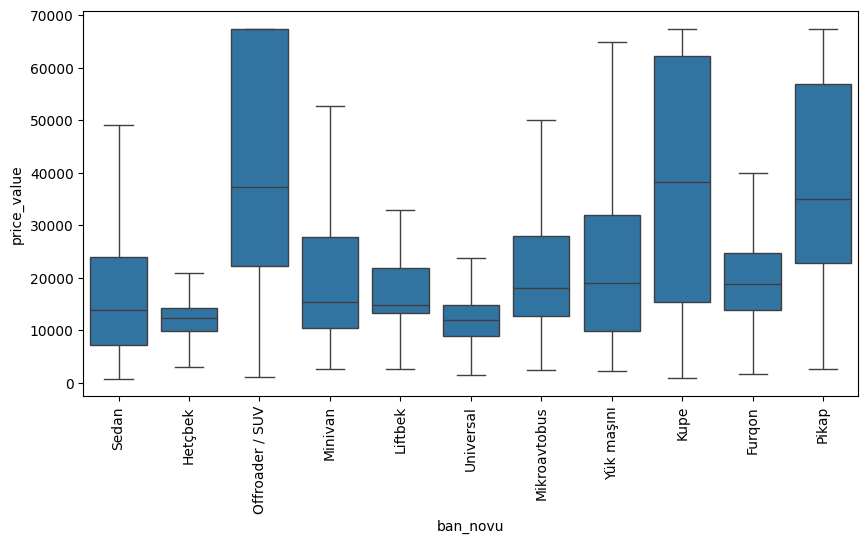

In [116]:
plt.figure(figsize=(10,5))
sns.boxplot(data=turbo, x="ban_novu", y="price_value", showfliers=False)
plt.xticks(rotation=90)
plt.show()

## City

"City" sütunundakı verilənlərə əsasən, maşınların satıldığı şəhərlərin təhlili nəticəsində "Baki" sütunu yaratdım. Bu sütun, maşınların Bakıda olub-olmadığını göstərir.
Məqsəd "City" sütunundakı verilənlərə əsasən, maşınların qiymətinə təsirinin analiz edilməsi idi. Yaradılan "Baki" sütunu, modelin Bakıda olan və olmayan maşınlar arasında qiymət fərqliliyini görməyə kömək etdi. Bu, maşınların satış qiymətlərinin daha effektiv şəkildə qiymətləndirilməsinə imkan verir

In [117]:
turbo.head(4)

,ban_novu,buraxilis_ili,city,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier
0,Sedan,2001,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Arxa,12900,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,333,3.85,315000,Xeyr,Bəli
1,Sedan,1999,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Arxa,11200,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,150,2.30,239000,Xeyr,Xeyr
2,Sedan,2013,Bakı,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Ön,10500,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,103,1.60,172000,Xeyr,Xeyr
3,Sedan,2013,Sumqayıt,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Ön,13400,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,110,1.60,92000,Xeyr,Xeyr


In [118]:
turbo.city.value_counts()

city
Bakı        19009
Sumqayıt     2267
Gəncə         857
Lənkəran      318
Xırdalan      205
            ...  
Babək           1
Şərur           1
Laçın           1
Liman           1
Culfa           1
Name: count, Length: 69, dtype: int64

In [119]:
turbo.city.value_counts(normalize=True)

city
Bakı        0.717890
Sumqayıt    0.085615
Gəncə       0.032365
Lənkəran    0.012010
Xırdalan    0.007742
              ...   
Babək       0.000038
Şərur       0.000038
Laçın       0.000038
Liman       0.000038
Culfa       0.000038
Name: proportion, Length: 69, dtype: float64

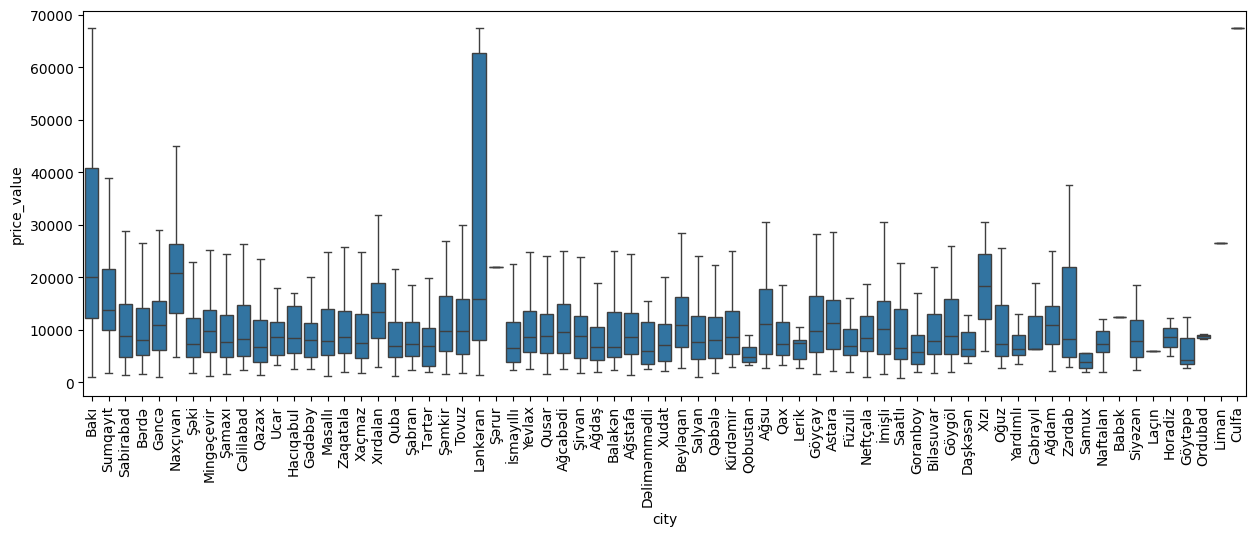

In [120]:
plt.figure(figsize=(15,5))
sns.boxplot(data=turbo, x="city", y="price_value", showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [121]:
turbo['baki'] = turbo['city'].apply(lambda x: "Bəli" if x == 'Bakı' else "Xeyr")

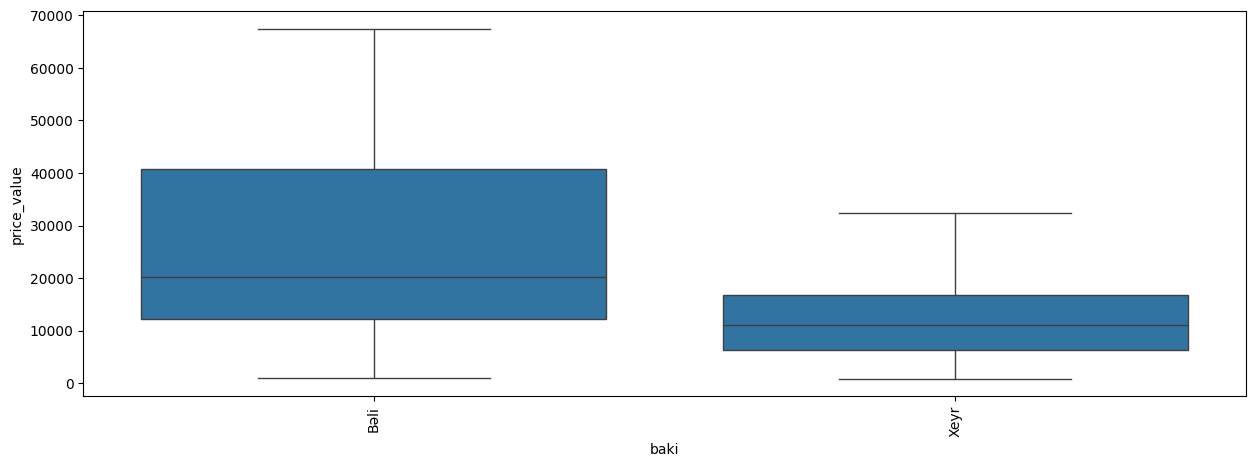

In [122]:
plt.figure(figsize=(15,5))
sns.boxplot(data=turbo, x="baki", y="price_value", showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [123]:
turbo.drop('city', axis=1, inplace=True)

In [124]:
turbo.head(4)

,ban_novu,buraxilis_ili,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,seller_name,seller_phone,shop_contact_list,shop_name,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki
0,Sedan,2001,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Arxa,12900,Qara,NaN,NaN,(050) 555-61-61,"Avtosalon ""Auto Store""",Avtomat,Benzin,333,3.85,315000,Xeyr,Bəli,Bəli
1,Sedan,1999,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Arxa,11200,Qara,Emil,(055) 500-49-49,NaN,NaN,Avtomat,Benzin,150,2.30,239000,Xeyr,Xeyr,Bəli
2,Sedan,2013,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Ön,10500,Tünd qırmızı,Eflatun,(050) 338-09-59,NaN,NaN,Avtomat,Benzin,103,1.60,172000,Xeyr,Xeyr,Bəli
3,Sedan,2013,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Ön,13400,Qara,Natiq,(010) 216-38-58,NaN,NaN,Avtomat,Benzin,110,1.60,92000,Xeyr,Xeyr,Xeyr


## Buraxılış İli

"buraxılış ili" sütununun "yaş" sütunu ilə dəyişdirilməsi, modelin maşınların yaşını daha doğru bir şəkildə qiymətləndirməsinə kömək edir və analizlərin daha dəqiq olmasını təmin edir.

In [125]:
turbo['yas']=turbo['buraxilis_ili'].apply(lambda x : 2022-x)

In [126]:
turbo.drop('buraxilis_ili', axis=1, inplace=True)

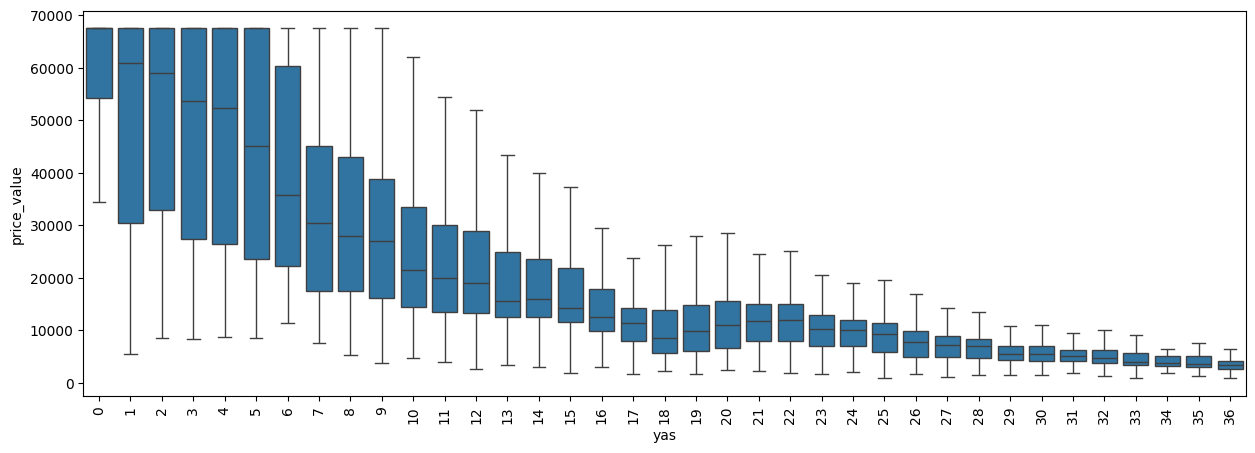

In [127]:
plt.figure(figsize=(15,5))
sns.boxplot(data=turbo, x="yas", y="price_value", showfliers=False)
plt.xticks(rotation=90)
plt.show()

## Satış Tipi

"sallar_name", "sallar_phone", "shop_name" və "shop_contact_list" sütunlarının analizi zamanı, bu məlumatların bir "satış tipi" altında birləşdirilməsinin daha məqsədli olduğuna qərarina gəldim.
Bu sütun, hər bir satışın mənbəsini və növünü açıqlayır. "satış Tipi" sütunu, datasetin targetdəki təsirini daha aydın və məqsədəuyğun şəkildə modelə bildirir.

In [128]:
print(len(turbo[(turbo["seller_name"].isna())&(turbo["shop_name"].isna())]))
print(len(turbo[(~turbo["seller_name"].isna())&(~turbo["shop_name"].isna())]))
print(len(turbo[(~turbo["seller_name"].isna())&(turbo["seller_phone"].isna())]))
print(len(turbo[(turbo["seller_name"].isna())&(~turbo["seller_phone"].isna())]))
print(len(turbo[(~turbo["shop_name"].isna())&(turbo["shop_contact_list"].isna())]))
print(len(turbo[(turbo["shop_name"].isna())&(~turbo["shop_contact_list"].isna())]))

24
0
0
0
0
0


In [129]:
turbo["satish_tipi"]=np.where(~turbo["seller_name"].isna(),"shexsi satish", np.where(~turbo["shop_name"].isna(),"magaza satish","melumat yoxdur"))

In [130]:
turbo['satish_tipi'].value_counts()

satish_tipi
shexsi satish     21328
magaza satish      5127
melumat yoxdur       24
Name: count, dtype: int64

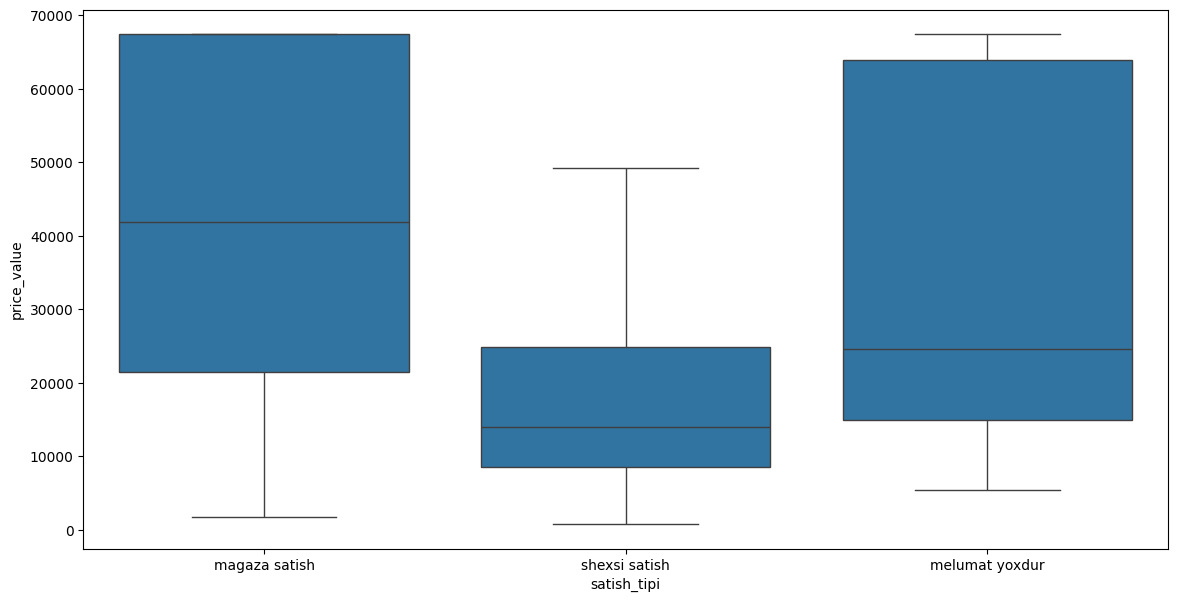

In [131]:
plt.figure(figsize=(14,7))
sns.boxplot(data=turbo, x="satish_tipi", y="price_value", showfliers=False)
plt.show()

In [132]:
turbo.drop(['seller_name','seller_phone','shop_contact_list','shop_name'], axis=1, inplace=True)

In [133]:
turbo.head(4)

,ban_novu,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,satish_tipi
0,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Arxa,12900,Qara,Avtomat,Benzin,333,3.85,315000,Xeyr,Bəli,Bəli,21,magaza satish
1,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Arxa,11200,Qara,Avtomat,Benzin,150,2.30,239000,Xeyr,Xeyr,Bəli,23,shexsi satish
2,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Ön,10500,Tünd qırmızı,Avtomat,Benzin,103,1.60,172000,Xeyr,Xeyr,Bəli,9,shexsi satish
3,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Ön,13400,Qara,Avtomat,Benzin,110,1.60,92000,Xeyr,Xeyr,Xeyr,9,shexsi satish


## Suret Qutusu

"Oturucu" sütunda "Avtomat", "Mexaniki", "Variator", və "Robotlaşdırılmış" sətirləri var. Bunları analiz etdiyim zaman, bu sətirlərin "target" sütunu ilə olan təsirini qiymətləndirdim. Bu analiz yanaşı bir neçə analiz ilə "Variator" və "Robotlaşdırılmış" masinların həmdə  "Avtomat" formasının olduğunu müəyyənləşdirdim. Bu səbəblə, bütün bu sətirləri "Avtomat" adı altında birləşdirdim. BoxPlot ile baxdığım zaman targetə təsirdə fərq olmadiç amma daha anlaşılır oldu

In [134]:
turbo.suret_qutusu.value_counts()

suret_qutusu
Avtomat             17233
Mexaniki             8953
Variator              237
Robotlaşdırılmış       56
Name: count, dtype: int64

In [135]:
turbo[turbo["suret_qutusu"]=="Robotlaşdırılmış"]

,ban_novu,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,satish_tipi
369,Hetçbek,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Changan,CX 20,Ön,11100,Boz,Robotlaşdırılmış,Benzin,86,1.40,141000,Xeyr,Xeyr,Bəli,8,shexsi satish
689,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Hyundai,Elantra,Ön,26500,Boz,Robotlaşdırılmış,Benzin,210,1.60,88514,Xeyr,Xeyr,Bəli,4,shexsi satish
768,Hetçbek,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Xeyr,Changan,Benni,Ön,7800,Ağ,Robotlaşdırılmış,Benzin,70,1.00,139000,Xeyr,Xeyr,Bəli,8,shexsi satish
1040,Hetçbek,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Xeyr,Smart,Forfour,Ön,9500,Mavi,Robotlaşdırılmış,Benzin,95,1.30,200000,Xeyr,Xeyr,Bəli,16,shexsi satish
1218,Liftbek,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Xeyr,Toyota,Prius,Ön,14600,Yaşıl,Robotlaşdırılmış,Hibrid,76,1.50,209000,Xeyr,Xeyr,Bəli,14,shexsi satish
1405,Hetçbek,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,MG,3,Ön,12000,Gümüşü,Robotlaşdırılmış,Benzin,106,1.50,111000,Xeyr,Xeyr,Bəli,10,shexsi satish
3653,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,528,Arxa,40800,Qara,Robotlaşdırılmış,Benzin,245,2.00,129000,Xeyr,Xeyr,Bəli,7,shexsi satish
4874,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,530,Tam,19000,Qara,Robotlaşdırılmış,Benzin,258,3.00,100000,Xeyr,Xeyr,Bəli,16,shexsi satish
5075,Sedan,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Par...",Xeyr,Toyota,Prius,Ön,25400,Mavi,Robotlaşdırılmış,Hibrid,76,1.50,216400,Xeyr,Xeyr,Bəli,14,shexsi satish
5160,Offroader / SUV,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə...",Xeyr,Mitsubishi,Pajero,Tam,17500,Gümüşü,Robotlaşdırılmış,Benzin,188,3.00,182000,Xeyr,Xeyr,Xeyr,16,shexsi satish


In [136]:
turbo[(turbo["model"]=='Passat')&(turbo['suret_qutusu']=='Variator')]

,ban_novu,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,satish_tipi
14812,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Volkswagen,Passat,Ön,5300,Göy,Variator,Benzin,150,1.8,150650,Bəli,Xeyr,Bəli,24,shexsi satish


In [137]:
turbo[turbo["model"]=="Passat"]

,ban_novu,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,satish_tipi
57,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,Volkswagen,Passat,Ön,10500,Boz,Avtomat,Benzin,200,2.0,263000,Xeyr,Xeyr,Bəli,15,shexsi satish
520,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,Volkswagen,Passat,Ön,7000,Göy,Avtomat,Benzin,150,1.8,291000,Xeyr,Xeyr,Bəli,18,shexsi satish
780,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Volkswagen,Passat,Ön,14900,Ağ,Avtomat,Benzin,160,1.8,210000,Xeyr,Xeyr,Bəli,13,shexsi satish
982,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,Volkswagen,Passat,Ön,7700,Boz,Avtomat,Benzin,170,1.8,287000,Xeyr,Xeyr,Bəli,18,shexsi satish
1303,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Volkswagen,Passat,Ön,11000,Ağ,Avtomat,Benzin,150,2.0,242402,Xeyr,Xeyr,Xeyr,14,shexsi satish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29649,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Kondisioner,Ot...",Xeyr,Volkswagen,Passat,Ön,7400,Gümüşü,Avtomat,Benzin,170,1.8,248900,Xeyr,Xeyr,Bəli,18,shexsi satish
29989,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Volkswagen,Passat,Ön,19400,Göy,Avtomat,Benzin,180,1.8,179000,Xeyr,Xeyr,Bəli,9,shexsi satish
30366,Sedan,"ABS,Lyuk,Mərkəzi qapanma,Park radarı,Kondision...",Xeyr,Volkswagen,Passat,Ön,7600,Qara,Avtomat,Benzin,150,2.0,247522,Xeyr,Xeyr,Xeyr,17,shexsi satish
30997,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Volkswagen,Passat,Ön,19500,Qara,Avtomat,Benzin,170,1.8,135000,Xeyr,Xeyr,Xeyr,10,shexsi satish


In [138]:
turbo['suret_qutusu'] = turbo['suret_qutusu'].apply(lambda x: "Avtomat" if x in ['Variator', 'Robotlaşdırılmış'] else x)

In [139]:
turbo.suret_qutusu.value_counts()

suret_qutusu
Avtomat     17526
Mexaniki     8953
Name: count, dtype: int64

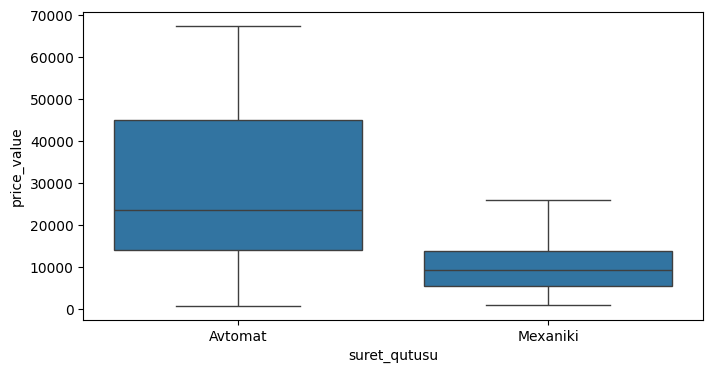

In [140]:
plt.figure(figsize=(8,4))
sns.boxplot(data=turbo, x="suret_qutusu", y="price_value", showfliers=False)
plt.show()

## Oturucu

Oturucudə də eyni analizlə qarşılaşdım və 'Arxa' və 'Ön' sətirlərini 'Sade' adı altinda birleşdirdim. Model üçün daha anlaşılır oldu 

sonda dəyərləri '1' və '0' ilə əvəz etdim

In [141]:
turbo.oturucu.unique()

array(['Arxa', 'Ön', 'Tam'], dtype=object)

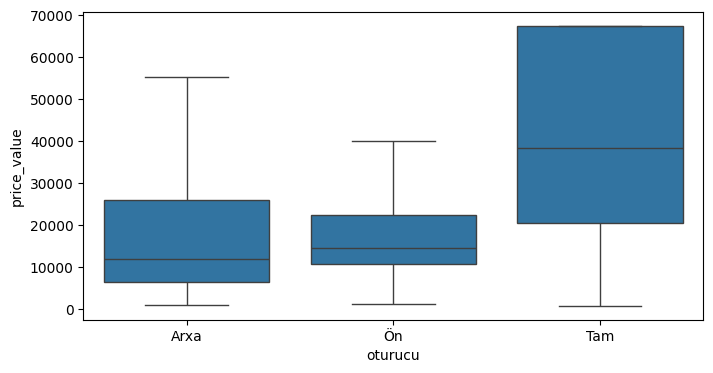

In [142]:
plt.figure(figsize=(8,4))
sns.boxplot(data=turbo, x="oturucu", y="price_value", showfliers=False)
plt.show()

In [143]:
turbo['oturucu']=turbo['oturucu'].apply(lambda x : "Sadə" if x in ["Arxa","Ön"] else x)

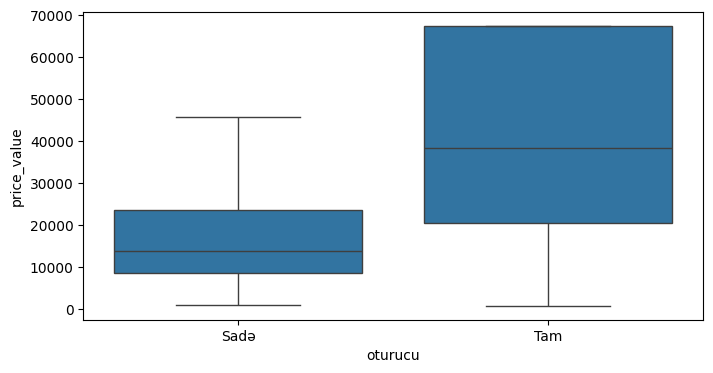

In [144]:
plt.figure(figsize=(8,4))
sns.boxplot(data=turbo, x="oturucu", y="price_value", showfliers=False)
plt.show()

## Yanacaq Novu

"yanacaq_novu" sütununda Benzin, Dizel, Hibrid, Plug-in Hibrid, Elektro və Qaz sətirləri mövcuddur. Hibrid, Plug-in Hibrid və Elektro yanacaqlar və Qaz, Alternativ yanacaq kateqoriyasında daxil edilir. Bu analiz zamanı, Hibrid, Plug-in Hibrid və Elektro yanacaqların Qazdan fərqli olaraq, target sütununa daha çox təsir etdiyini müəyyənləşdirdim. Bu səbəbə görə, bu üç yanacaq növünü Alternativ yanacaq adı altında birləşdirmək qərarına gəldim.

In [145]:
turbo.yanacaq_novu.value_counts()

yanacaq_novu
Benzin            19935
Dizel              5338
Hibrid              990
Plug-in Hibrid      107
Elektro              69
Qaz                  40
Name: count, dtype: int64

In [146]:
turbo['yanacaq_novu']=turbo['yanacaq_novu'].apply(lambda x : "Alternatif Yanacaq" if x in ["Elektro","Plug-in Hibrid","Hibrid"] else x)

In [147]:
turbo.yanacaq_novu.value_counts()

yanacaq_novu
Benzin                19935
Dizel                  5338
Alternatif Yanacaq     1166
Qaz                      40
Name: count, dtype: int64

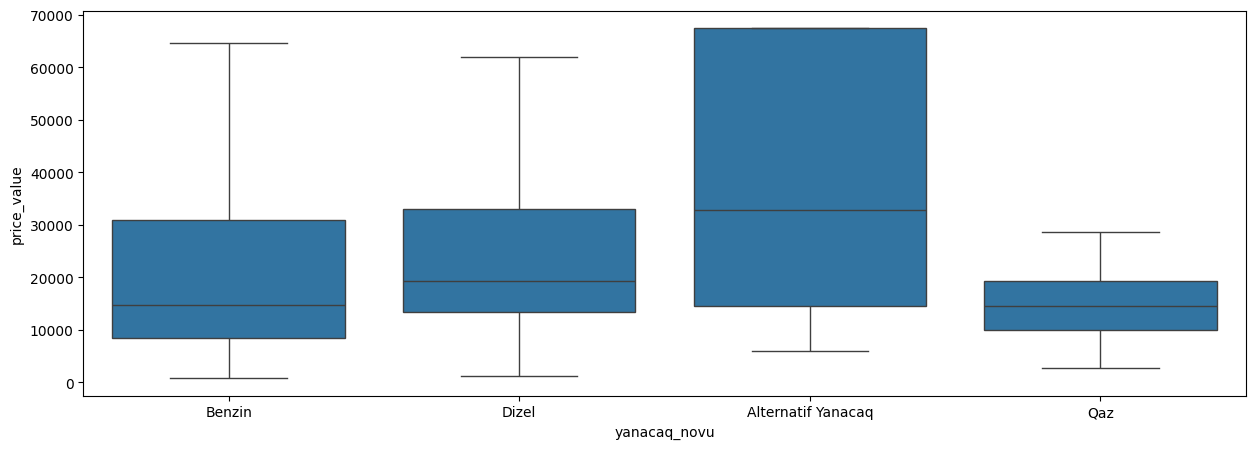

In [148]:
plt.figure(figsize=(15,5))
sns.boxplot(data=turbo, x="yanacaq_novu", y="price_value", showfliers=False)
plt.show()

In [149]:
turbo.head(4)

,ban_novu,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,satish_tipi
0,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Sadə,12900,Qara,Avtomat,Benzin,333,3.85,315000,Xeyr,Bəli,Bəli,21,magaza satish
1,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Sadə,11200,Qara,Avtomat,Benzin,150,2.30,239000,Xeyr,Xeyr,Bəli,23,shexsi satish
2,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Sadə,10500,Tünd qırmızı,Avtomat,Benzin,103,1.60,172000,Xeyr,Xeyr,Bəli,9,shexsi satish
3,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Sadə,13400,Qara,Avtomat,Benzin,110,1.60,92000,Xeyr,Xeyr,Xeyr,9,shexsi satish


## Reng

"reng" sütununda, target sütununa daha az təsir edən rəngləri 'digər rənglər' adı altında birləşdirdim. Bu addım, rənglər arasında olan fərqləri qiymətləndirərək, target sütununa olan təsirə daha çox diqqət yetirməyə imkan verəcək.

In [150]:
turbo.reng.value_counts()

reng
Ağ              7309
Qara            6800
Gümüşü          3347
Göy             2193
Yaş Asfalt      1753
Boz             1513
Tünd qırmızı     636
Yaşıl            626
Qırmızı          581
Mavi             408
Bej              383
Qızılı           381
Qəhvəyi          254
Narıncı           94
Sarı              94
Bənövşəyi         93
Çəhrayı           14
Name: count, dtype: int64

In [151]:
turbo.reng.value_counts(normalize=True)

reng
Ağ              0.276030
Qara            0.256807
Gümüşü          0.126402
Göy             0.082820
Yaş Asfalt      0.066203
Boz             0.057140
Tünd qırmızı    0.024019
Yaşıl           0.023641
Qırmızı         0.021942
Mavi            0.015408
Bej             0.014464
Qızılı          0.014389
Qəhvəyi         0.009593
Narıncı         0.003550
Sarı            0.003550
Bənövşəyi       0.003512
Çəhrayı         0.000529
Name: proportion, dtype: float64

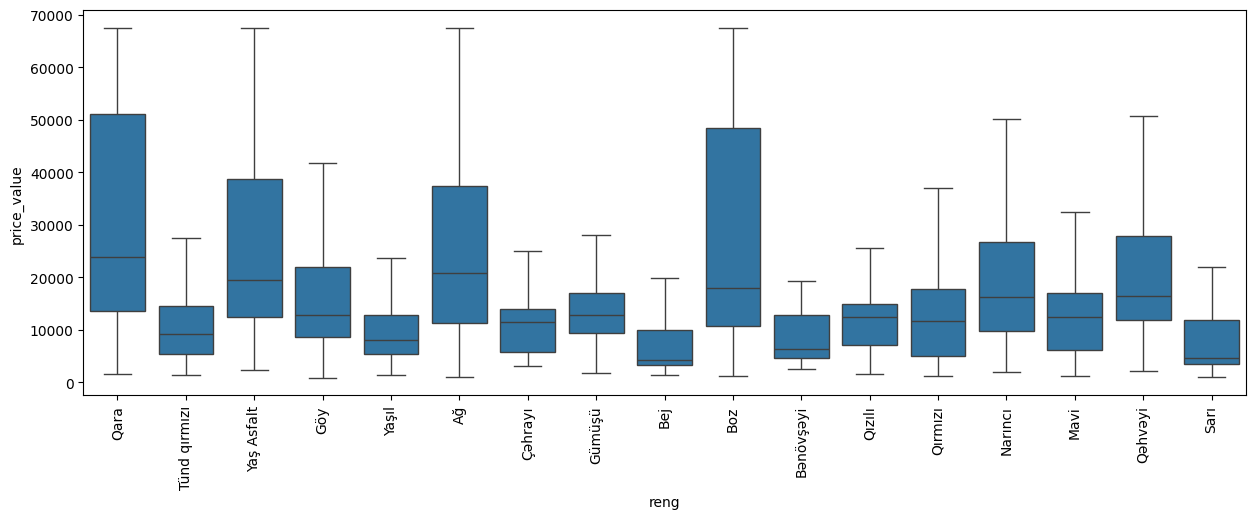

In [152]:
plt.figure(figsize=(15,5))
sns.boxplot(data=turbo, x="reng", y="price_value", showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [153]:
turbo['reng']=turbo['reng'].apply(lambda x : "Diger Rengler" if x in ["Mavi","Bej","Qızılı","Qəhvəyi","Narıncı","Sarı","Bənövşəyi","Çəhrayı"] else x)

In [154]:
turbo.reng.value_counts()

reng
Ağ               7309
Qara             6800
Gümüşü           3347
Göy              2193
Yaş Asfalt       1753
Diger Rengler    1721
Boz              1513
Tünd qırmızı      636
Yaşıl             626
Qırmızı           581
Name: count, dtype: int64

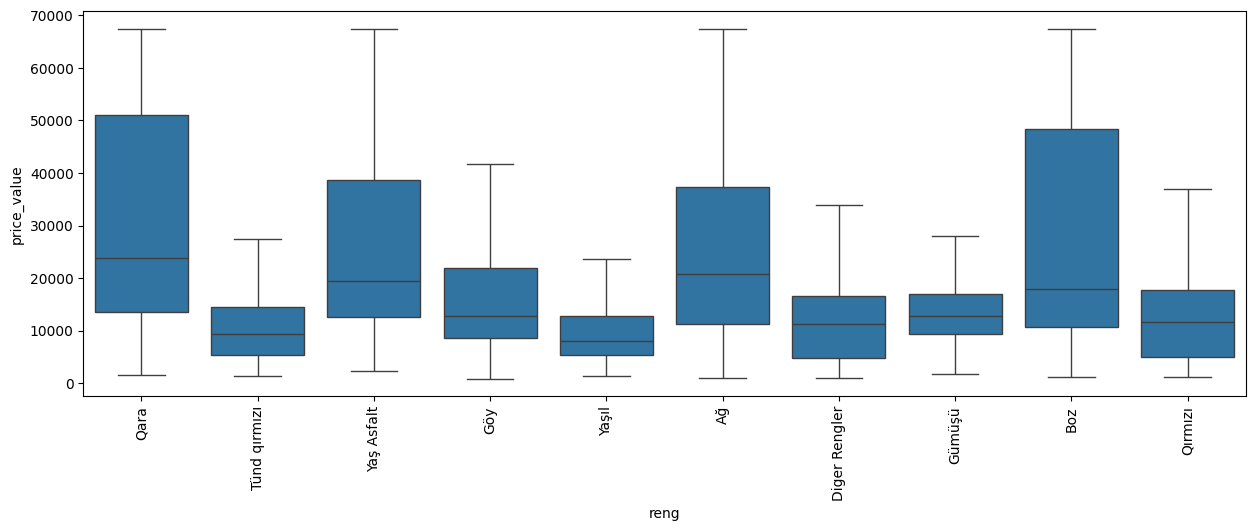

In [155]:
plt.figure(figsize=(15,5))
sns.boxplot(data=turbo, x="reng", y="price_value", showfliers=False)
plt.xticks(rotation=90)
plt.show()

In [156]:
turbo.head(4)

,ban_novu,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,satish_tipi
0,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,745,Sadə,12900,Qara,Avtomat,Benzin,333,3.85,315000,Xeyr,Bəli,Bəli,21,magaza satish
1,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Sadə,11200,Qara,Avtomat,Benzin,150,2.30,239000,Xeyr,Xeyr,Bəli,23,shexsi satish
2,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,FAW,Besturn B50,Sadə,10500,Tünd qırmızı,Avtomat,Benzin,103,1.60,172000,Xeyr,Xeyr,Bəli,9,shexsi satish
3,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Brilliance,H 530,Sadə,13400,Qara,Avtomat,Benzin,110,1.60,92000,Xeyr,Xeyr,Xeyr,9,shexsi satish


## Marka

"marka" sütununda, targetə az təsir edən markaları "Diger + Ban_novu" adı altında birləşdirdim. Bu addım, analizlərdə daha az əhəmiyyətli olan markaları qruplaşdıraraq target sütununa olan təsirin daha ətraflı təhlil edilməsinə imkan verir.

In [157]:
markaa=turbo.marka.value_counts()

markaa

marka
Mercedes      4719
LADA (VAZ)    3280
Toyota        2417
Hyundai       2377
Kia           1905
              ... 
Polestar         1
Scion            1
RAF              1
Datsun           1
Abarth           1
Name: count, Length: 113, dtype: int64

In [158]:
markaa[markaa>50]

marka
Mercedes       4719
LADA (VAZ)     3280
Toyota         2417
Hyundai        2377
Kia            1905
BMW            1850
Opel           1412
Chevrolet      1133
Nissan          931
Ford            898
Land Rover      642
Volkswagen      534
Lexus           470
Mitsubishi      458
GAZ             408
Audi            237
Honda           233
Renault         225
Daewoo          189
Porsche         150
Mazda           138
Jeep            134
Infiniti        114
KamAz           112
Khazar          104
Tofas            98
Fiat             93
Changan          70
Chery            62
Saipa            60
Iran Khodro      53
Name: count, dtype: int64

In [159]:
marka_ad=list(markaa[markaa<50].index)
turbo.reset_index(drop=True, inplace=True)
turbo.loc[turbo["marka"].isin(marka_ad), "marka"] = turbo.loc[turbo["marka"].isin(marka_ad), "ban_novu"].apply(lambda x: "Diger " + x)

In [160]:
turbo.marka.value_counts()

marka
Mercedes                 4719
LADA (VAZ)               3280
Toyota                   2417
Hyundai                  2377
Kia                      1905
BMW                      1850
Opel                     1412
Chevrolet                1133
Nissan                    931
Ford                      898
Land Rover                642
Volkswagen                534
Lexus                     470
Mitsubishi                458
GAZ                       408
Diger Offroader / SUV     312
Diger Sedan               276
Audi                      237
Honda                     233
Renault                   225
Daewoo                    189
Porsche                   150
Diger Yük maşını          139
Mazda                     138
Jeep                      134
Infiniti                  114
KamAz                     112
Khazar                    104
Tofas                      98
Diger Hetçbek              94
Fiat                       93
Changan                    70
Chery                      62
Saip

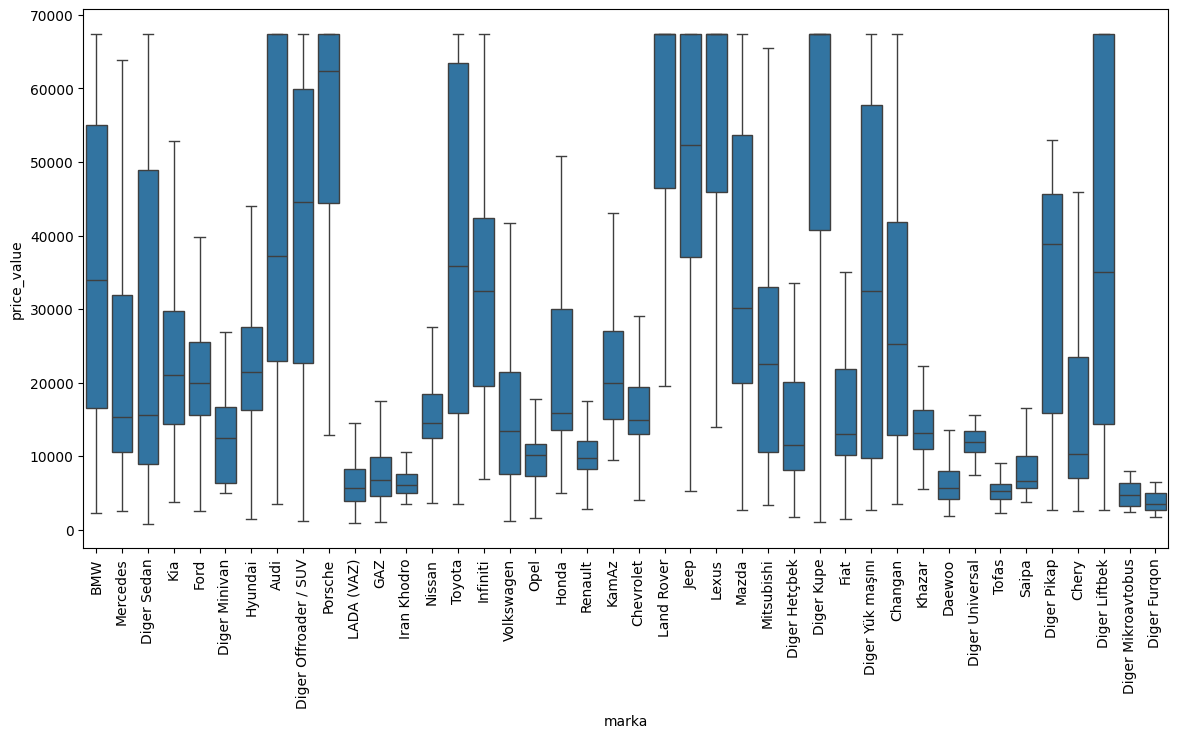

In [161]:
plt.figure(figsize=(14,7))
sns.boxplot(data=turbo, x="marka", y="price_value", showfliers=False)
plt.xticks(rotation=90)
plt.show()

## Model

'model' sütunda da "marka" sütununda olduğu kimi, targetə az təsir edən modelləri "Diger + marka" adı altında birləşdirdim. Bu addım, analizlərdə daha az əhəmiyyətli olan markaları qruplaşdıraraq target sütununa olan təsirin daha ətraflı təhlil edilməsinə imkan verir.

In [162]:
modell=turbo.model.value_counts()
modell

model
Astra         978
2107          899
2106          747
Cruze         609
Sonata        573
             ... 
2757            1
Tiggo 3         1
Vito 114        1
Caliber         1
Murcielago      1
Name: count, Length: 1147, dtype: int64

In [163]:
modell[modell>50]

model
Astra        978
2107         899
2106         747
Cruze        609
Sonata       573
            ... 
S 320         55
Q7            54
Note          53
Patrol        51
Outlander     51
Name: count, Length: 96, dtype: int64

In [164]:
model_ad=list(modell[modell<50].index)

turbo.loc[turbo["model"].isin(model_ad), "model"]=turbo.loc[turbo["model"].isin(model_ad), "marka"].apply(lambda x : "diger"+' '+x)

In [165]:
turbo.model.value_counts()

model
diger Mercedes              1203
Astra                        978
2107                         899
2106                         747
Cruze                        609
                            ... 
diger Diger Liftbek           17
diger Jeep                    15
diger Diger Furqon            14
diger Diger Minivan           13
diger Diger Mikroavtobus       4
Name: count, Length: 140, dtype: int64

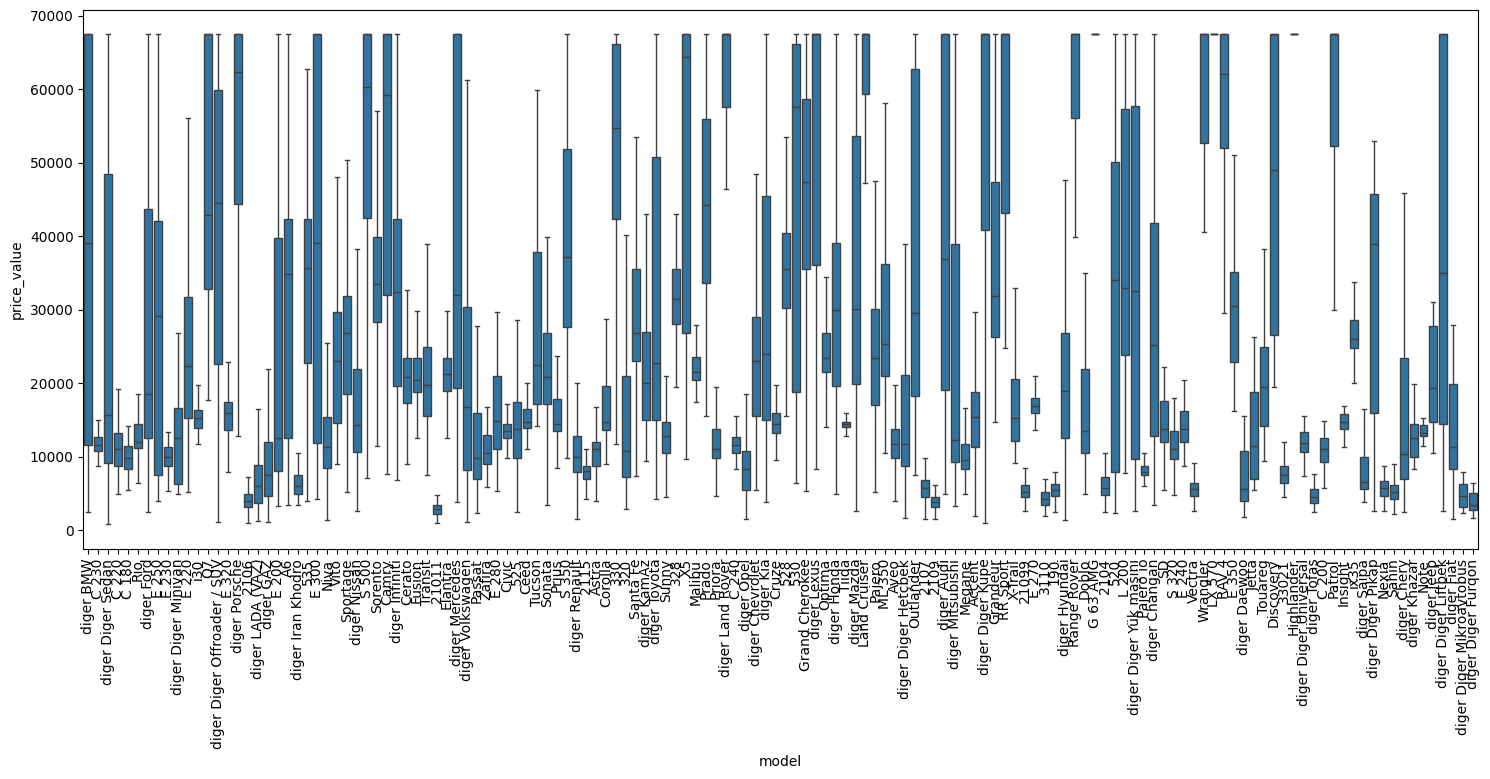

In [166]:
plt.figure(figsize=(18,7))
sns.boxplot(data=turbo, x="model", y="price_value", showfliers=False)
plt.xticks(rotation=90)
plt.show()

## Diger Gostericiler 

'diger_gostericiler'də əvvəldə bildirdiyim kimi yeni və əhəmiyyətli sütünlar yaradırıq və sonda 'diger_gostericiler' sütununu silirik 

In [167]:
turbo.head(4)

,ban_novu,diger_gostericiler,is_new,marka,model,oturucu,price_value,reng,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,satish_tipi
0,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,BMW,diger BMW,Sadə,12900,Qara,Avtomat,Benzin,333,3.85,315000,Xeyr,Bəli,Bəli,21,magaza satish
1,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Mercedes,C 230,Sadə,11200,Qara,Avtomat,Benzin,150,2.30,239000,Xeyr,Xeyr,Bəli,23,shexsi satish
2,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",Xeyr,Diger Sedan,diger Diger Sedan,Sadə,10500,Tünd qırmızı,Avtomat,Benzin,103,1.60,172000,Xeyr,Xeyr,Bəli,9,shexsi satish
3,Sedan,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Xeyr,Diger Sedan,diger Diger Sedan,Sadə,13400,Qara,Avtomat,Benzin,110,1.60,92000,Xeyr,Xeyr,Xeyr,9,shexsi satish


In [168]:
turbo["diger_gostericiler"] = turbo["diger_gostericiler"].str.split(",")

unique_features = set()
for i in turbo['diger_gostericiler']:
    if isinstance(i, list):
        unique_features.update(i)
    else:
        unique_features.add(i)

unique_features = list(unique_features)

for feature in unique_features:
    turbo[feature] = turbo['diger_gostericiler'].apply(lambda x: 1 if feature in x else 0)

turbo.drop(columns=['diger_gostericiler'], inplace=True)

In [169]:
turbo

,ban_novu,is_new,marka,model,oturucu,price_value,reng,suret_qutusu,yanacaq_novu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,satish_tipi,Kondisioner,Arxa görüntü kamerası,Mərkəzi qapanma,Park radarı,Oturacaqların ventilyasiyası,Ksenon lampalar,Yan pərdələr,Yüngül lehimli disklər,Dəri salon,Lyuk,Oturacaqların isidilməsi,ABS,Yağış sensoru
0,Sedan,Xeyr,BMW,diger BMW,Sadə,12900,Qara,Avtomat,Benzin,333,3.85,315000,Xeyr,Bəli,Bəli,21,magaza satish,1,0,1,1,1,1,1,1,1,1,1,1,1
1,Sedan,Xeyr,Mercedes,C 230,Sadə,11200,Qara,Avtomat,Benzin,150,2.30,239000,Xeyr,Xeyr,Bəli,23,shexsi satish,1,0,1,0,0,1,0,1,1,1,0,1,1
2,Sedan,Xeyr,Diger Sedan,diger Diger Sedan,Sadə,10500,Tünd qırmızı,Avtomat,Benzin,103,1.60,172000,Xeyr,Xeyr,Bəli,9,shexsi satish,1,0,1,1,1,0,1,1,1,1,0,1,0
3,Sedan,Xeyr,Diger Sedan,diger Diger Sedan,Sadə,13400,Qara,Avtomat,Benzin,110,1.60,92000,Xeyr,Xeyr,Xeyr,9,shexsi satish,1,1,1,1,1,1,1,1,1,1,0,1,1
4,Sedan,Xeyr,Mercedes,C 220,Sadə,8800,Yaş Asfalt,Avtomat,Benzin,150,2.20,298889,Xeyr,Xeyr,Bəli,27,shexsi satish,1,0,1,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26474,Offroader / SUV,Xeyr,Lexus,diger Lexus,Tam,34500,Qara,Avtomat,Benzin,275,3.85,233000,Xeyr,Bəli,Bəli,15,shexsi satish,1,1,1,1,0,1,1,1,1,1,0,1,1
26475,Sedan,Xeyr,Mercedes,diger Mercedes,Sadə,62560,Qara,Avtomat,Dizel,204,2.20,128900,Xeyr,Xeyr,Bəli,7,shexsi satish,1,1,1,1,1,1,1,1,1,1,1,1,1
26476,Sedan,Xeyr,Mercedes,diger Mercedes,Tam,67450,Qara,Avtomat,Dizel,330,2.90,13000,Xeyr,Bəli,Bəli,1,magaza satish,1,1,1,1,1,1,1,1,1,1,1,1,1
26477,Offroader / SUV,Bəli,Lexus,diger Lexus,Tam,67450,Boz,Avtomat,Benzin,150,2.00,0,Xeyr,Bəli,Bəli,0,magaza satish,1,1,1,0,0,1,0,1,0,0,1,1,1


In [170]:
turbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26479 entries, 0 to 26478
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ban_novu                      26479 non-null  object 
 1   is_new                        26479 non-null  object 
 2   marka                         26479 non-null  object 
 3   model                         26479 non-null  object 
 4   oturucu                       26479 non-null  object 
 5   price_value                   26479 non-null  int32  
 6   reng                          26479 non-null  object 
 7   suret_qutusu                  26479 non-null  object 
 8   yanacaq_novu                  26479 non-null  object 
 9   muherrik_a.g                  26479 non-null  int32  
 10  muherrik_l                    26479 non-null  float64
 11  yurus_km                      26479 non-null  int32  
 12  null                          26479 non-null  object 
 13  o

## Data Encoding

Data kodlaması zamanı, "get_dummies" və "target encoding" yöntəmlərindən istifadə etdim. "Get_dummies" kategorik verilənləri ikili (binary) dəyişənlərə çevirir və hər bir kategorik dəyişəni yeni bir sütun kimi qəbul edir, bu sütunlara 1 və 0 dəyərləri təyin edir. "Target encoding" (məsələn : 'marka','model') isə hər bir kategorik dəyişəni hədəf dəyişən ilə əlaqələndirir və bu əlaqəyə əsasən kategorik dəyişənləri bir nömrəyə çevirir.

In [171]:
turbo['suret_qutusu']=turbo['suret_qutusu'].apply(lambda x : 1 if x=="Avtomat" else 0)
turbo['outlier']=turbo['outlier'].apply(lambda col : 1 if col=="Bəli" else 0)
turbo['oturucu']=turbo['oturucu'].apply(lambda x : 1 if x=='Tam' else 0)
turbo['null']=turbo['null'].apply(lambda col : 1 if col=="Bəli" else 0)
turbo['is_new']=turbo['is_new'].apply(lambda x : 1 if x=='Bəli' else 0)
turbo['baki'] = turbo['baki'].apply(lambda x: 1 if x == 'Bəli' else 0)

In [172]:
liste=["ban_novu","reng","yanacaq_novu","satish_tipi"]

for col in liste:
    OneHot=pd.get_dummies(turbo[col], prefix=col).astype(int)
    turbo=turbo.drop(col, axis=1)
    turbo=turbo.join(OneHot)

In [173]:
turbo

,is_new,marka,model,oturucu,price_value,suret_qutusu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,Kondisioner,Arxa görüntü kamerası,Mərkəzi qapanma,Park radarı,Oturacaqların ventilyasiyası,Ksenon lampalar,Yan pərdələr,Yüngül lehimli disklər,Dəri salon,Lyuk,Oturacaqların isidilməsi,ABS,Yağış sensoru,ban_novu_Furqon,ban_novu_Hetçbek,ban_novu_Kupe,ban_novu_Liftbek,ban_novu_Mikroavtobus,ban_novu_Minivan,ban_novu_Offroader / SUV,ban_novu_Pikap,ban_novu_Sedan,ban_novu_Universal,ban_novu_Yük maşını,reng_Ağ,reng_Boz,reng_Diger Rengler,reng_Göy,reng_Gümüşü,reng_Qara,reng_Qırmızı,reng_Tünd qırmızı,reng_Yaş Asfalt,reng_Yaşıl,yanacaq_novu_Alternatif Yanacaq,yanacaq_novu_Benzin,yanacaq_novu_Dizel,yanacaq_novu_Qaz,satish_tipi_magaza satish,satish_tipi_melumat yoxdur,satish_tipi_shexsi satish
0,0,BMW,diger BMW,0,12900,1,333,3.85,315000,0,1,1,21,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1,0,Mercedes,C 230,0,11200,1,150,2.30,239000,0,0,1,23,1,0,1,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0,Diger Sedan,diger Diger Sedan,0,10500,1,103,1.60,172000,0,0,1,9,1,0,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,Diger Sedan,diger Diger Sedan,0,13400,1,110,1.60,92000,0,0,0,9,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,0,Mercedes,C 220,0,8800,1,150,2.20,298889,0,0,1,27,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26474,0,Lexus,diger Lexus,1,34500,1,275,3.85,233000,0,1,1,15,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
26475,0,Mercedes,diger Mercedes,0,62560,1,204,2.20,128900,0,0,1,7,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
26476,0,Mercedes,diger Mercedes,1,67450,1,330,2.90,13000,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
26477,1,Lexus,diger Lexus,1,67450,1,150,2.00,0,0,1,1,0,1,1,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [174]:
import category_encoders as ce

X = turbo.drop(['price_value'], axis=1)
y = turbo['price_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cols = ["marka", "model"]

te = ce.TargetEncoder(cols=cols)

X_train_encoded = te.fit_transform(X_train[cols], y_train)

X_test_encoded = te.transform(X_test[cols])

In [175]:
X_train['marka'] = X_train_encoded.marka

X_test['marka'] = X_test_encoded.marka

X_train['model'] = X_train_encoded.marka

X_test['model'] = X_test_encoded.marka

In [176]:
X_train

,is_new,marka,model,oturucu,suret_qutusu,muherrik_a.g,muherrik_l,yurus_km,null,outlier,baki,yas,Kondisioner,Arxa görüntü kamerası,Mərkəzi qapanma,Park radarı,Oturacaqların ventilyasiyası,Ksenon lampalar,Yan pərdələr,Yüngül lehimli disklər,Dəri salon,Lyuk,Oturacaqların isidilməsi,ABS,Yağış sensoru,ban_novu_Furqon,ban_novu_Hetçbek,ban_novu_Kupe,ban_novu_Liftbek,ban_novu_Mikroavtobus,ban_novu_Minivan,ban_novu_Offroader / SUV,ban_novu_Pikap,ban_novu_Sedan,ban_novu_Universal,ban_novu_Yük maşını,reng_Ağ,reng_Boz,reng_Diger Rengler,reng_Göy,reng_Gümüşü,reng_Qara,reng_Qırmızı,reng_Tünd qırmızı,reng_Yaş Asfalt,reng_Yaşıl,yanacaq_novu_Alternatif Yanacaq,yanacaq_novu_Benzin,yanacaq_novu_Dizel,yanacaq_novu_Qaz,satish_tipi_magaza satish,satish_tipi_melumat yoxdur,satish_tipi_shexsi satish
10146,1,56680.892100,56680.892100,1,1,200,2.0,0,0,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
15506,0,6779.650860,6779.650860,0,0,65,1.5,31349,0,1,1,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
23222,0,24843.939653,24843.939653,0,1,136,2.0,312500,0,0,1,24,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
9578,0,6779.650860,6779.650860,1,0,80,1.7,7600,0,0,0,8,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
12692,0,22744.907563,22744.907563,0,0,140,2.4,500500,0,1,0,21,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0,13461.960478,13461.960478,0,0,113,1.7,78000,0,0,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5390,0,9655.099644,9655.099644,0,0,90,1.4,210000,0,0,1,12,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
860,0,38461.185877,38461.185877,0,1,218,2.5,5400,0,1,1,0,1,1,1,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
15795,0,24843.939653,24843.939653,0,1,170,2.4,239523,0,0,0,24,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


## Modeling

Modelinizdə, XGBoost regressorunu istifadə edərək güclü bir maşın öyrənmə algoritması seçdim. XGBoost, Gradient Boosting frameworkündən istifadə edir və regresiya problemlərinin həllində effektivdir.

In [177]:
def eval_regressor(model, X, y):

    y_pred = model.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    
    rmse = root_mean_squared_error(y, y_pred)

    mae = mean_absolute_error(y, y_pred)
    
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    
    med_ape = np.median(np.abs((y - y_pred) / y)) * 100
    
    mean_error = np.mean(y-y_pred)

    r2 = r2_score(y, y_pred)
    
    n = len(y)  # number of data points
    p = X.shape[1]  # number of predictors
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    df = pd.DataFrame({
            "Metric":["Mean_Error", "MSE","RMSE","MAE","MAPE", "MED_APE","R2","Adjusted R2"],
            "Score": [mean_error,  mse,rmse, mae, mape, med_ape, r2, adjusted_r2]
    })
    
    return df

def eval_reg_final(model, X_train, X_test, y_train, y_test):
    eval_train = eval_regressor(model, X_train, y_train)
    eval_test = eval_regressor(model, X_test, y_test)
    
    return eval_train.merge(eval_test, on="Metric", suffixes=["_Train","_Test"])

def plot_importances(model, X):
    
    importances = model.feature_importances_

    feature_importances = pd.DataFrame(importances, index=X.columns, columns=["importance"])

    feature_importances_sorted = feature_importances.sort_values(by="importance", ascending=False)

    plt.figure(figsize=(10, 10))
    sns.barplot(x="importance", y=feature_importances_sorted.index, data=feature_importances_sorted)
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

In [178]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [179]:
score=eval_reg_final(xgb_regressor, X_train, X_test, y_train, y_test)
score

,Metric,Score_Train,Score_Test
0,Mean_Error,3.897761e-01,7.262914e+00
1,MSE,5.870266e+06,1.187840e+07
2,RMSE,2.422863e+03,3.446505e+03
3,MAE,1.561050e+03,2.035264e+03
4,MAPE,1.001958e+01,1.270670e+01
5,MED_APE,6.364119e+00,7.275805e+00
6,R2,9.850550e-01,9.708056e-01
7,Adjusted R2,9.850175e-01,9.705104e-01


In [180]:
y_train.max()

67450

In [181]:
pd.options.display.float_format = '{:.3f}'.format

score

,Metric,Score_Train,Score_Test
0,Mean_Error,0.390,7.263
1,MSE,5870265.980,11878398.894
2,RMSE,2422.863,3446.505
3,MAE,1561.050,2035.264
4,MAPE,10.020,12.707
5,MED_APE,6.364,7.276
6,R2,0.985,0.971
7,Adjusted R2,0.985,0.971


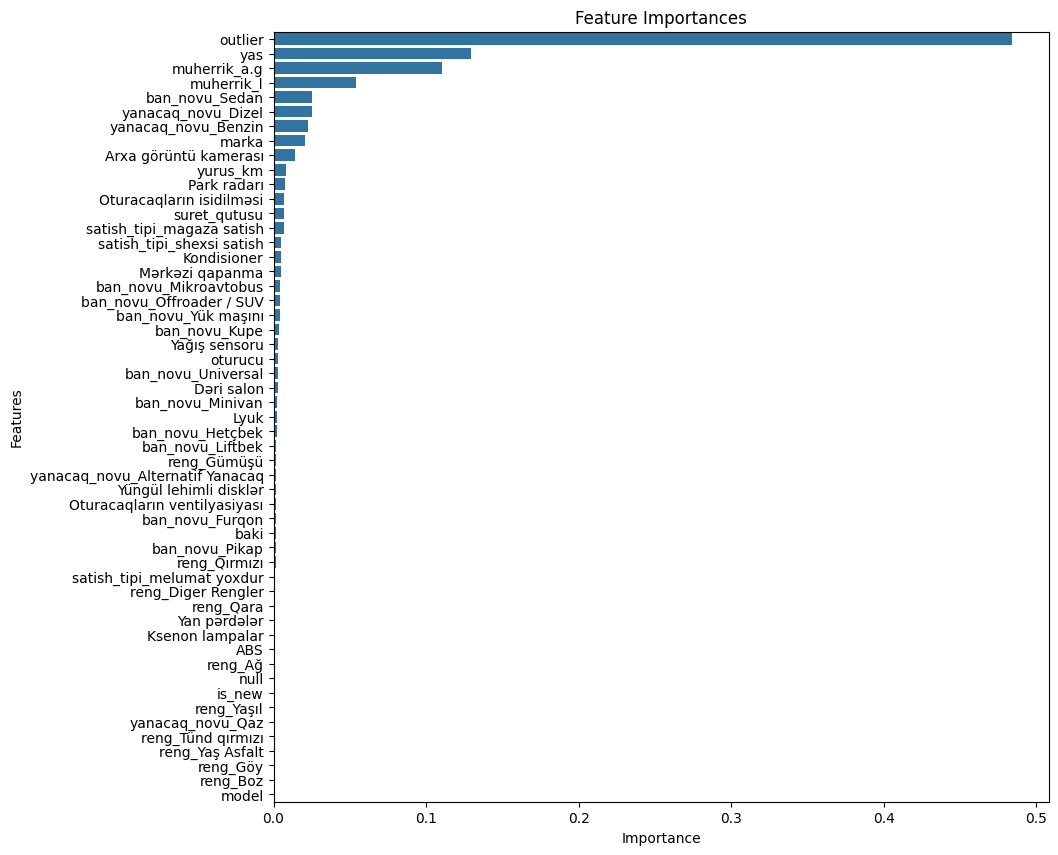

In [182]:
importances = xgb_regressor.feature_importances_

feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["importance"])

feature_importances_sorted = feature_importances.sort_values(by="importance", ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x="importance", y=feature_importances_sorted.index, data=feature_importances_sorted)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Modeli ən əhəmiyyətli 20 xüsusiyyət (feature) ilə yenidən təyin etdikdən sonra yenidən uyğunlaşdırdım. 
Bu, modelin daha məqbul vəziyyətdə olmasını və daha dəqiq proqnozlar verməsini təmin edir.

In [183]:
imp_features = feature_importances_sorted.index[:20]

In [184]:
X_train_new = X_train[imp_features]
X_test_new = X_test[imp_features]

In [185]:
xgb_regressor_2 = xgb.XGBRegressor(objective='reg:squarederror')

xgb_regressor_2.fit(X_train_new, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [186]:
y_train.max()

67450

In [187]:
eval_reg_final(xgb_regressor_2, X_train_new, X_test_new, y_train, y_test)


,Metric,Score_Train,Score_Test
0,Mean_Error,0.330,23.342
1,MSE,6231797.621,12686953.110
2,RMSE,2496.357,3561.875
3,MAE,1607.899,2069.171
4,MAPE,10.238,12.727
5,MED_APE,6.542,7.434
6,R2,0.984,0.969
7,Adjusted R2,0.984,0.969


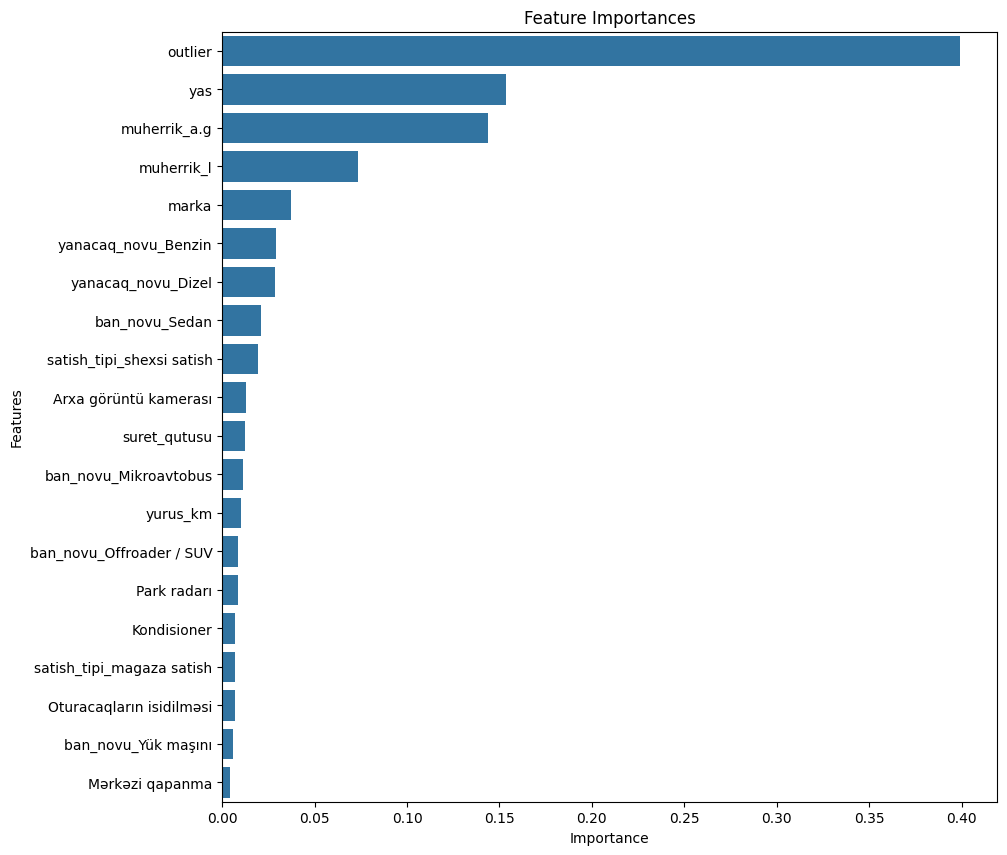

In [188]:
plot_importances(xgb_regressor_2, X_train_new)